## Preparation Work

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, LassoCV
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the data files
medical = pd.read_csv('longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')
scripts = pd.read_csv('longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv',low_memory=False)

# Drop completely identical rows
medical = medical.drop_duplicates()
scripts = scripts.drop_duplicates()

In [3]:
# Display the medical data
medical.head(5)

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_state,patient_short_zip,patient_age,patient_gender,place_of_service,...,diag_4,diag_5,rev_center_code,rev_center_units,proc_code,proc_modifier,proc_units,line_charge,claim_charge,smart_allowed
0,00006390c96ebfffed580074c35a16a7,d5e15811af1d772f54af52f3560be0a5,f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...,d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...,7/13/20,CA,922.0,55.0,M,Home,...,NaN,NaN,NaN,1.0,A6549,NU,2.0,300.00,300.00,974.13
2,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,7/19/23,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3074F,NaN,1.0,0.00,0.00,46.57
3,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,7/19/23,CA,922.0,60.0,M,Office,...,L03115,L03116,NaN,1.0,3078F,NaN,1.0,0.00,0.00,56.38
4,00006d564a4718c744f1bbf1b6c5f8c3,42ba4419d9ad7c9293d76686fb608f10,9e4534892128401c693a6ab2ea758cd6a0a6484972168b...,da5cef18317c14180ed561a84001d8a033d724d541a2c0...,8/11/23,CA,900.0,55.0,F,Independent Laboratory,...,NaN,NaN,NaN,1.0,80053,NaN,1.0,88.07,88.07,15.16
5,00006d564a4718c744f1bbf1b6c5f8c3,cad5e8635fd011bfec2b65d161b15254,3b0f0f71ac05c34ab9307c4853f1af59420c07b522cdf2...,eafff3ebf33ebe534edc66e761d9b52d1381653d9d0d57...,11/1/19,CA,900.0,50.0,F,Office,...,M4317,N200,NaN,1.0,72072,NaN,1.0,107.00,107.00,72.42


In [4]:
# Display the scripts data
scripts.head(5)

,journey_id,cohort_id,claim_id,patient_gender,patient_state,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,...,bin,plan_pay,reject_code_1,reject_code_3,reject_code_4,reject_code_5,ndc,active,start_date,end_date
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
1,00006390c96ebfffed580074c35a16a7,16,dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
2,00006390c96ebfffed580074c35a16a7,16,02927d081fad10afffcba79bad27f94ff52c98e968aaec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
3,00006390c96ebfffed580074c35a16a7,16,a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,47335067381,True,190001,NaN
4,00006390c96ebfffed580074c35a16a7,16,b65634edd78998753fe9606b142b2fff7765d6c576973c...,M,CA,922.0,1961-01-01,1.215361e+09,NaN,1750479168,...,22659.0,NaN,NaN,NaN,NaN,NaN,65862059805,True,190001,NaN


## 1. Exploratory Data Analysis

When exploring the datasets, I mainly focus on the medical dataset and start cleaning the data.

### 1.1 Diagnosis code

Diagnosis code shows the diagnosis of patients and help us identify Obese and Hypertensive patients.

In [5]:
# Select 'diag_' columns
diag_columns = [col for col in medical.columns if col.startswith('diag_')]
df_diag = medical[diag_columns]

# Combine values 
combined_list = df_diag.values.flatten().tolist()
combined_list = [x for x in combined_list if pd.notna(x)]

# Process first three digits
first_three_counts = {}
for diag_code in combined_list:
    first_three = diag_code[:3]
    first_three_counts[first_three] = first_three_counts.get(first_three, 0) + 1

# Sort the dictionary items by count (descending order)
sorted_counts = sorted(first_three_counts.items(), key=operator.itemgetter(1), reverse=True)
for items in sorted_counts[:50]:
    print(items)

('E11', 211459)
('I10', 182243)
('E78', 103400)
('Z00', 86398)
('E66', 64255)
('Z68', 49646)
('M25', 46770)
('M54', 45206)
('Z12', 29420)
('N18', 28871)
('Z01', 27922)
('Z13', 27419)
('M79', 26331)
('G47', 25427)
('R10', 24785)
('E55', 24525)
('Z79', 24457)
('Z71', 24295)
('R07', 22571)
('R73', 22483)
('E03', 22244)
('N39', 19937)
('M17', 19467)
('D64', 18052)
('I25', 15879)
('Z20', 15172)
('R53', 14766)
('I50', 14064)
('R06', 13761)
('J44', 13039)
('F41', 12419)
('Z23', 12290)
('I48', 11517)
('K21', 11196)
('G89', 10667)
('Z11', 10310)
('I11', 10132)
('F33', 9878)
('N40', 9720)
('J45', 9623)
('E87', 9571)
('M19', 9148)
('M47', 8723)
('D50', 8619)
('R68', 8574)
('A41', 8443)
('J96', 8380)
('U07', 8144)
('R05', 8113)
('F32', 8062)


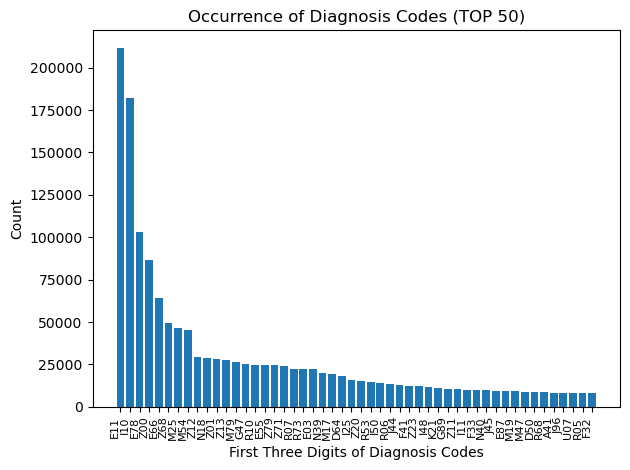

In [6]:
# Select and display top 50 diagnosis
top50_diag = sorted_counts[:50]

# Extract labels and values
labels = [item[0] for item in top50_diag]
values = [item[1] for item in top50_diag]

# Create the bar chart
plt.bar(labels, values)

# Labels and title 
plt.xlabel("First Three Digits of Diagnosis Codes")
plt.ylabel("Count")
plt.title("Occurrence of Diagnosis Codes (TOP 50)")

# Optional: Rotate x labels if they are long or overlapping
if len(labels) > 5:  
    plt.xticks(rotation=90, ha='right', fontsize=8)  

# Adjust layout for better display
plt.tight_layout()

# Show the plot
plt.show()

From the analysis above, we can identify the TOP 5 diagnosis are:

- E11  Type 2 diabetes mellitus
- I10  Essential (primary) hypertension
- E78  Disorders of lipoprotein metabolism and other lipidemias
- Z00  Encounter for general examination without complaint, suspected or reported diagnosis
- E66  Overweight and obesity

Among these diagnosis, we are interested in E66. We are also interested in other diagnosis related to obese and hypertensive and we need to transform them into the outcome variable later.

### 1.2 Proc_code

We can use proc_code to identify what kind of medicine the patients are given, paying special attention to Ozempic.

In [7]:
# Display the information of the proc_code column
print(medical['proc_code'].value_counts())

proc_code
80053    19052
99213    17927
36415    17880
99214    16814
80061    12775
         ...  
24640        1
27618        1
JDUD1        1
C1765        1
C1786        1
Name: count, Length: 6342, dtype: int64


In [8]:
# Count the number of missing value
print(medical['proc_code'].isnull().sum())

21703


In [9]:
# Filter the information by "Ozempic"
filtered_df = medical[medical['proc_code'] == "J3490"]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 705 entries, 216 to 622748
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   journey_id         705 non-null    object 
 1   episode_id         705 non-null    object 
 2   visit_id           705 non-null    object 
 3   encounter_id       705 non-null    object 
 4   claim_date         705 non-null    object 
 5   patient_state      705 non-null    object 
 6   patient_short_zip  705 non-null    float64
 7   patient_age        685 non-null    float64
 8   patient_gender     705 non-null    object 
 9   place_of_service   185 non-null    object 
 10  visit_type         686 non-null    object 
 11  payor              683 non-null    object 
 12  payor_channel      663 non-null    object 
 13  ref_npi            156 non-null    float64
 14  hcp_npi            611 non-null    float64
 15  hcp_taxonomy       609 non-null    object 
 16  hcp_specialty      609 non

Proc_code is a categorial variable containing 6342 different categories (not include missing value). Beside 21703 missing values, the 5 top medcines are 80053, 99213, 36415, 99214, and 80061. The code of Ozempic is J3490 and 705 entires are treated with Ozemplic.

### 1.3 Geographic information

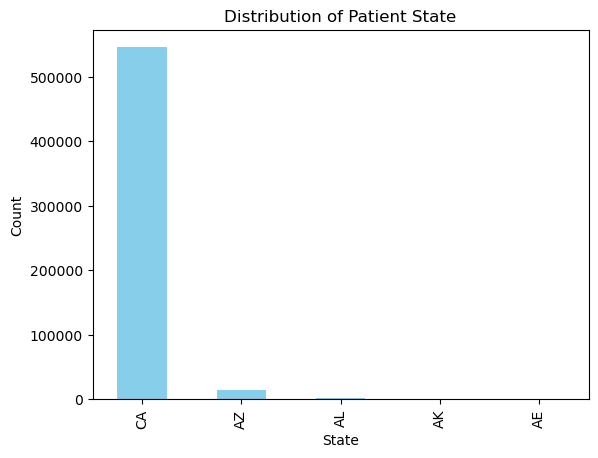

In [10]:
# Patient State: count the number of each State
counts = medical['patient_state'].value_counts()

# Draw barplot to show the distribution
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Patient State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

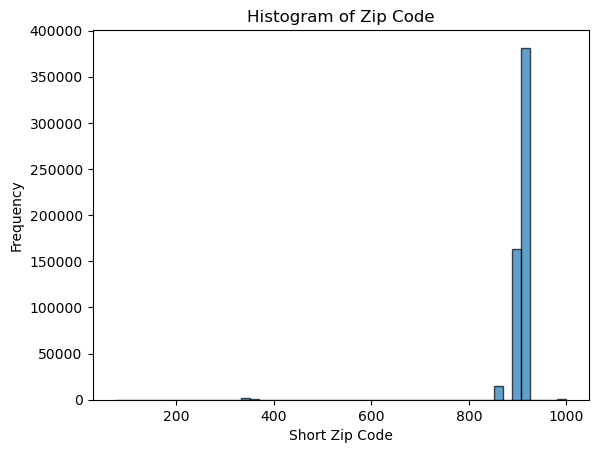

In [11]:
# Patient Zipcode: show the distribution of zipcode
plt.hist(medical['patient_short_zip'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Histogram of Zip Code")
plt.xlabel("Short Zip Code")
plt.ylabel("Frequency")
plt.show()

Most of patients in this dataset are from California, which is consistent with the distribution of short zip code.

### 1.4 Gender and age distribution

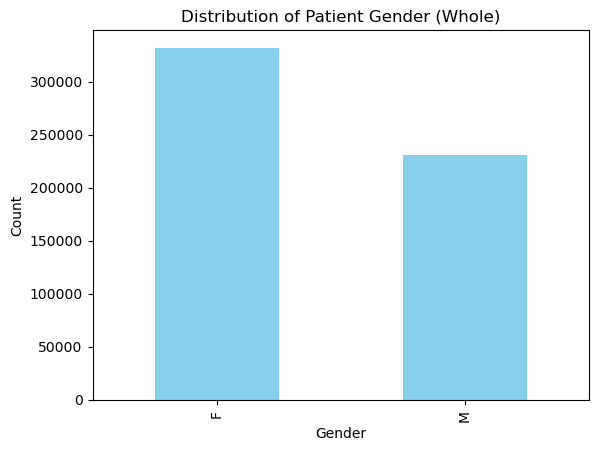

In [12]:
# Gender: whole dataset
gender_whole = medical['patient_gender'].value_counts()

# Draw barplot to show the distribution
gender_whole.plot(kind='bar', color='skyblue')
plt.title('Distribution of Patient Gender (Whole)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

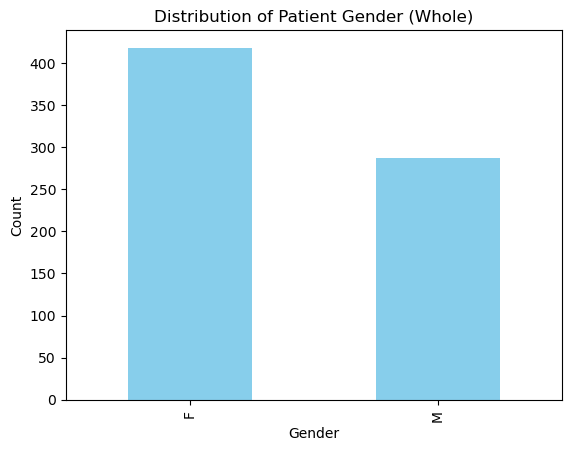

In [13]:
# Gender: Ozempic subset
gender_ozempic = filtered_df['patient_gender'].value_counts()

# Draw barplot to show the distribution
gender_ozempic.plot(kind='bar', color='skyblue')
plt.title('Distribution of Patient Gender (Whole)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

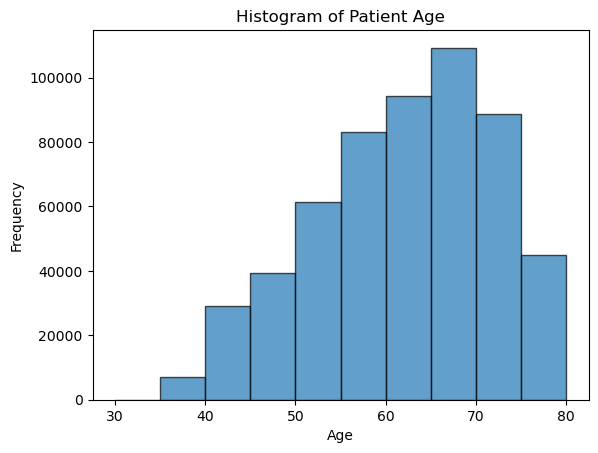

In [14]:
# Age: whole dataset
plt.hist(medical['patient_age'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of Patient Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

- In terms of gender, the amount of female patient is greater than male patients in both medical dataset and the Ozempic subset.
- In terms of age, the range of patient age is between 30 and 80. The distribution is skewed to left.

### 1.5 Claim time of Obesity or Hypertension

In [15]:
# Choose the patients with obesity or Hypertension
df_new = medical[
      medical['diag_1'].str.startswith("E66")|
      medical['diag_2'].str.startswith("E66")|
      medical['diag_3'].str.startswith("E66")|
      medical['diag_4'].str.startswith("E66")|
      medical['diag_5'].str.startswith("E66")|
      medical['diag_1'].str.startswith("I10")|
      medical['diag_2'].str.startswith("I10")|
      medical['diag_3'].str.startswith("I10")|
      medical['diag_4'].str.startswith("I10")|
      medical['diag_5'].str.startswith("I10")]

# Check the basic information of this data
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169490 entries, 6 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         169490 non-null  object 
 1   episode_id         169490 non-null  object 
 2   visit_id           169213 non-null  object 
 3   encounter_id       169490 non-null  object 
 4   claim_date         169490 non-null  object 
 5   patient_state      169490 non-null  object 
 6   patient_short_zip  169482 non-null  float64
 7   patient_age        167867 non-null  float64
 8   patient_gender     169470 non-null  object 
 9   place_of_service   129457 non-null  object 
 10  visit_type         163331 non-null  object 
 11  payor              163197 non-null  object 
 12  payor_channel      157079 non-null  object 
 13  ref_npi            71430 non-null   float64
 14  hcp_npi            125628 non-null  float64
 15  hcp_taxonomy       124393 non-null  object 
 16  hcp_spe

Text(0.5, 1.0, 'Diagnosis of Obesity and Hypertension')

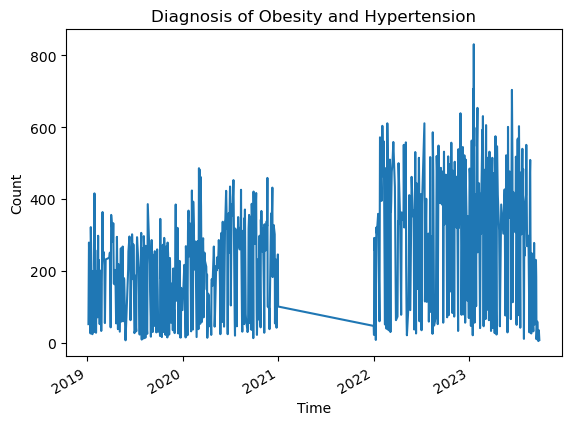

In [16]:
# Claim time of the diagnosis case
time_count = pd.to_datetime(df_new['claim_date'], format='%m/%d/%y').value_counts().sort_index()

# Draw a line chart
time_count.plot()
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Diagnosis of Obesity and Hypertension")

There are 169490 entries related to obesity and hypertension in this dataset. From 2019 to 2023, the monthly confirmed diagnosis exhibited a fluctuating upward trend, reaching a peak in early 2023, exceeding 800 cases. And there is no record for 2021.

## 2. Data Merging and Processing 
### 2.1 Merging two datastes

In [17]:
# Redefine two datasets
df = medical
df2 = scripts

# Filter the medical dataset by age
df = df[(df['patient_age'] >= 40) & (df['patient_age'] <= 75)]

In [18]:
# Choose patients with obesity or hypertension in both datasets
df = df[df['diag_1'].str.startswith("E66")|
      df['diag_2'].str.startswith("E66")|
      df['diag_3'].str.startswith("E66")|
      df['diag_4'].str.startswith("E66")|
      df['diag_5'].str.startswith("E66")|
      df['diag_1'].str.startswith("I10")|
      df['diag_2'].str.startswith("I10")|
      df['diag_3'].str.startswith("I10")|
      df['diag_4'].str.startswith("I10")|
      df['diag_5'].str.startswith("I10")]
df2 = df2[df2['diagnosis_code'].str.startswith("E66")|
      df2['diagnosis_code'].str.startswith("I10")]

In [19]:
# Merge the two datasets
merged_df = pd.merge(df, df2, on='journey_id', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179587 entries, 0 to 179586
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     179587 non-null  object 
 1   episode_id                     179587 non-null  object 
 2   visit_id                       179494 non-null  object 
 3   encounter_id                   179587 non-null  object 
 4   claim_date                     179587 non-null  object 
 5   patient_state_x                179587 non-null  object 
 6   patient_short_zip              179587 non-null  float64
 7   patient_age                    179587 non-null  float64
 8   patient_gender_x               179587 non-null  object 
 9   place_of_service_x             139107 non-null  object 
 10  visit_type                     170955 non-null  object 
 11  payor                          176182 non-null  object 
 12  payor_channel                 

### 2.2 Choosing variables
The merged dataset has too many columns and we only want to keep the columns we need to conduct following analysis. So we choose the useful variable at first. Moreover, because the variables I want to keep are all in the medical data set, I'll use this dataset to continue the data processing.

In [20]:
# Choose useful variables and drop other variables
df = medical[['journey_id','claim_date','patient_state','patient_short_zip',
                'patient_age','patient_gender','visit_type','diag_1','diag_2','diag_3','diag_4','diag_5',
                'smart_allowed','proc_code']]

# Drop the rows that contain the same information
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540859 entries, 0 to 623524
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         540859 non-null  object 
 1   claim_date         540859 non-null  object 
 2   patient_state      540859 non-null  object 
 3   patient_short_zip  540846 non-null  float64
 4   patient_age        538243 non-null  float64
 5   patient_gender     540747 non-null  object 
 6   visit_type         521379 non-null  object 
 7   diag_1             540046 non-null  object 
 8   diag_2             397441 non-null  object 
 9   diag_3             313167 non-null  object 
 10  diag_4             254069 non-null  object 
 11  diag_5             171232 non-null  object 
 12  smart_allowed      540859 non-null  float64
 13  proc_code          533283 non-null  object 
dtypes: float64(3), object(11)
memory usage: 61.9+ MB


In [21]:
# Filter obese and hypersentive patient by diagnosis
df = df[df['diag_1'].str.startswith("E66")|
        df['diag_2'].str.startswith("E66")|
        df['diag_3'].str.startswith("E66")|
        df['diag_4'].str.startswith("E66")|
        df['diag_1'].str.startswith("I10")|
        df['diag_2'].str.startswith("I10")|
        df['diag_3'].str.startswith("I10")|
        df['diag_4'].str.startswith("I10")|
        df['diag_5'].str.startswith("I10")]

# Filter age
df = df[(df['patient_age'] >= 40) & (df['patient_age'] <= 75)]

# Display the information again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156995 entries, 6 to 623524
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         156995 non-null  object 
 1   claim_date         156995 non-null  object 
 2   patient_state      156995 non-null  object 
 3   patient_short_zip  156987 non-null  float64
 4   patient_age        156995 non-null  float64
 5   patient_gender     156995 non-null  object 
 6   visit_type         151107 non-null  object 
 7   diag_1             156995 non-null  object 
 8   diag_2             150479 non-null  object 
 9   diag_3             140238 non-null  object 
 10  diag_4             124464 non-null  object 
 11  diag_5             89649 non-null   object 
 12  smart_allowed      156995 non-null  float64
 13  proc_code          154868 non-null  object 
dtypes: float64(3), object(11)
memory usage: 18.0+ MB


For outcome variable, we'd like to see the change of diagnosis of the obese and hypertensive patients. Since the diag 1/2/3/4/5 show the diagnoses of a patient for different time, we can draw the outcome variable from these columns. If the patient has obesity or hypertension at the beginning but ends up without these two diagnosis, it means the treatment of the patient is success. On the contrary, if the patient is still diagnosed with obesity or hypertension at the last diagnosis, it's not success.

In [22]:
# Extract first 3 characters of diagnosis
df['diag_1'] = df['diag_1'].astype(str).str[:3]
df['diag_2'] = df['diag_2'].astype(str).str[:3]
df['diag_3'] = df['diag_3'].astype(str).str[:3]
df['diag_4'] = df['diag_4'].astype(str).str[:3]
df['diag_5'] = df['diag_5'].astype(str).str[:3]

# Define the function to identify the outcome variable
def check_success(row):
    # Check the last non-NaN diagnostic code
    for col in ['diag_5', 'diag_4', 'diag_3', 'diag_2', 'diag_1']:
        if pd.notna(row[col]):
            return 0 if row[col] in ['E66', 'I10'] else 1
            return 1

# Treat 'nan' strings as NaN values
df.replace('nan', np.nan, inplace = True)

# Apply the function to each row
df['success'] = df.apply(check_success, axis=1)

# Check the outcome variable
df['success'].value_counts()

success
1    115750
0     41245
Name: count, dtype: int64

For treatment variable, the definition is much simpler. If the pateint is treated with Ozempic, d=1; otherwise, d=0.

In [23]:
# Create treatment variable by proc_code
df['treatment'] = df['proc_code'].isin(['J3490', 'C9399']).astype(int)
df['treatment'].value_counts()

treatment
0    156776
1       219
Name: count, dtype: int64

### 2.3 Handling missing value
For the variables that I'm going to choose, only 'visit_type' has missing values. Since there's not many missing values, we can drop the rows with missing value.

In [24]:
# Drop columns with missing value
df = df.dropna(subset = ['visit_type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151107 entries, 6 to 623524
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         151107 non-null  object 
 1   claim_date         151107 non-null  object 
 2   patient_state      151107 non-null  object 
 3   patient_short_zip  151099 non-null  float64
 4   patient_age        151107 non-null  float64
 5   patient_gender     151107 non-null  object 
 6   visit_type         151107 non-null  object 
 7   diag_1             151107 non-null  object 
 8   diag_2             144778 non-null  object 
 9   diag_3             134873 non-null  object 
 10  diag_4             119653 non-null  object 
 11  diag_5             85778 non-null   object 
 12  smart_allowed      151107 non-null  float64
 13  proc_code          149325 non-null  object 
 14  success            151107 non-null  int64  
 15  treatment          151107 non-null  int64  
dtypes: floa

In [25]:
# Define the final dataset
df = df[['patient_short_zip','patient_age','patient_gender','visit_type','success','treatment']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151107 entries, 6 to 623524
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   patient_short_zip  151099 non-null  float64
 1   patient_age        151107 non-null  float64
 2   patient_gender     151107 non-null  object 
 3   visit_type         151107 non-null  object 
 4   success            151107 non-null  int64  
 5   treatment          151107 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 8.1+ MB


### 2.4 Encoding categorial variables
I'll transform the following variables: patient_short_zip, patient_gender_x, visit_type.

In [26]:
# Encode dummy variables: zip, gender, visit type
df = pd.get_dummies(df, columns=['patient_short_zip','patient_gender','visit_type'],dtype=int)

# Display the data
df.head(5)

,patient_age,success,treatment,patient_short_zip_101.0,patient_short_zip_109.0,patient_short_zip_112.0,patient_short_zip_170.0,patient_short_zip_334.0,patient_short_zip_337.0,patient_short_zip_344.0,...,patient_gender_F,patient_gender_M,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit
6,50.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10,50.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13,50.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
16,50.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
17,50.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## 3. Causal Analysis Setup
### 3.1 Potential endogeneity issues

Endogeneity refers to the presence of internal causal relationships or unobserved variables in a study, which can affect its credibility and the interpretation of results. In this analysis, we are interested in the effect of Ozempic on obesity and hypertension, so our treatment variable is using Ozempic or not. Endogeneity means that other indenpent variables may also influence both the treatment variable (having Ozempic or not) and outcome variable (successful treatment or not). Thus, we want to extract the independent causal treatment effect of Ozempic on the outcome variable (the successful treament of obesity or hypertension).

### 3.2 Strategies

In this case, double Lasso would be one of the solutions. At the first stage, we regress the treatment variable (d) on other confounders (X) and predict d_hat using the first stage model. Then we can identify the independent part of d to X. At the run another lasso regression of y on d, d_hat, and X, adding no penalty to d_hat to keep the effect of confounders on d. Then the coefficient of d shows the independent treatment effect. If it's not zero, we can conclude that the treatment effect exists. 

## 4. Model Development: Double Lasso
### 4.1 The first stage

In [27]:
# Define X and y
y = df['success']
X = df.drop(['success'],axis=1)

# Adding a constant 
X = sm.add_constant(X)

# Split test 20% and train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scale the data
X_train.head(5)

,const,patient_age,treatment,patient_short_zip_101.0,patient_short_zip_109.0,patient_short_zip_112.0,patient_short_zip_170.0,patient_short_zip_334.0,patient_short_zip_337.0,patient_short_zip_344.0,...,patient_gender_F,patient_gender_M,visit_type_ambulance visit,visit_type_emergency room visit,visit_type_home visit,visit_type_inpatient visit,visit_type_laboratory visit,visit_type_non-hospital institution visit,visit_type_outpatient visit,visit_type_pharmacy visit
371781,1.0,70.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
132020,1.0,40.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
411752,1.0,60.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
65646,1.0,65.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
190354,1.0,45.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [28]:
# Use X_train to conduct first stage lasso
d = X_train['treatment']
X_train_new = X_train.drop(['treatment'],axis=1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)

# Determining the optimal alpha value for the first stage
lasso_cv = LassoCV(alphas = np.logspace(-6, 6, 13), cv = 5, random_state = 42, max_iter = 10000)
lasso_cv.fit(X_train_scaled, d)
optimal_alpha = lasso_cv.alpha_
print("Optimal Alpha for the first stage:", optimal_alpha)

Optimal Alpha for the first stage: 1e-05


In [29]:
# Set up model on training data with a specific value of alpha
lasso = Lasso(alpha=0.00001)
lasso_stage_1 = lasso.fit(X_train_scaled, d)

# Display the coefficient of lasso model
print("Lasso coefficients:", lasso_stage_1.coef_)
print("Intercept:", lasso_stage_1.intercept_)

Lasso coefficients: [ 0.00000000e+00 -2.64097946e-04  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -3.12853176e-07 -0.00000000e+00
 -4.75832225e-06 -3.23149317e-05 -2.25570912e-05 -2.02179339e-05
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.73518744e-04  9.65121882e-05 -1.36304469e-06
 -2.75890637e-05 -4.44883999e-05 -9.64660393e-06 -1.23323509e-05
 -0.00000000e+00 -2.75148803e-05 -0.00000000e+00 -4.55362526e-04
  7.85135112e-04  5.83365194e-04  3.59835821e-04  3.93967402e-04
 -2.05639241e-04  1.66335675e-03 -0.00000000e+00 -1.58158150e-06
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -9.34526552e-07
 -8.33788309e-06  0.00000000e+00  4.41500230e-05 -1.91042671e-16
 -9.07418120e-05 -5.78573968e-05 -3.30380975e-04 -3.21302411e-04
  0.00000000e+00 -4.10289497e-04  4.92700983e-04  0.00000000e+00]
Intercept: 0.0014228398891508456


### 4.2 The second stage

In [30]:
# Using this model to predict d_hat
d_hat = lasso_stage_1.predict(X_train_scaled)

# Form the new X variable by combaning X_train(X and d) and d_hat
X_train['d_hat'] = d_hat
X_stage_2 = X_train

# Display the information of the new X variable to identify the treatment variable
X_stage_2.info()

# Scale the X variable of stage 2
X_stage_2_scaled = scaler.fit_transform(X_stage_2)

<class 'pandas.core.frame.DataFrame'>
Index: 120885 entries, 371781 to 502116
Data columns (total 54 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   const                                      120885 non-null  float64
 1   patient_age                                120885 non-null  float64
 2   treatment                                  120885 non-null  int64  
 3   patient_short_zip_101.0                    120885 non-null  int64  
 4   patient_short_zip_109.0                    120885 non-null  int64  
 5   patient_short_zip_112.0                    120885 non-null  int64  
 6   patient_short_zip_170.0                    120885 non-null  int64  
 7   patient_short_zip_334.0                    120885 non-null  int64  
 8   patient_short_zip_337.0                    120885 non-null  int64  
 9   patient_short_zip_344.0                    120885 non-null  int64  
 10  patient_

In [31]:
# Set up the penalty funtion for the second stage
class SelectiveRegularizationLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, penalty_indices, penalty_weights, tol=1e-4, max_iter=100):
        self.penalty_indices = penalty_indices
        self.penalty_weights = penalty_weights
        self.tol = tol
        self.max_iter = max_iter
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, coef, X, y):
        predictions = self._sigmoid(X @ coef)
        # Basic log loss
        basic_loss = log_loss(y, predictions)
        
        # Regularization term, selectively applied with L1 penalty
        reg_term = sum(self.penalty_weights[i] * abs(coef[self.penalty_indices[i]]) for i in range(len(self.penalty_indices)))
        
        return basic_loss + reg_term
    
    def fit(self, X, y):
        # Add intercept term
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        initial_coef = np.zeros(X.shape[1])
        result = minimize(self._loss, initial_coef, args=(X, y), method='SLSQP', tol=self.tol, options={'maxiter': self.max_iter})
        
        self.coef_ = result.x
        return self
    
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        proba = self._sigmoid(X @ self.coef_)
        return np.vstack([1-proba, proba]).T
    
    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

In [32]:
# Apply penalties to the 2nd to 54th coefficients
penalty_indices = list(range(1, 53))

# Penalty weights for these coefficients
penalty_weights =  [0.001] * 54  

# Fit the second stage model
model = SelectiveRegularizationLogisticRegression(penalty_indices = penalty_indices, penalty_weights = penalty_weights)
model.fit(X_stage_2_scaled, y_train)

SelectiveRegularizationLogisticRegression(penalty_indices=[1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                          penalty_weights=[0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001, ...])

In [33]:
# Extract coefficients of the model
model.coef_

array([ 1.05227438e+00, -1.28391655e-03,  4.12093619e-02,  2.46234390e-03,
       -4.70190218e-03,  3.31089828e-03,  1.16203422e-03, -1.28391655e-03,
        3.95963386e-03, -5.25813011e-03,  6.38223256e-03,  1.01877825e-02,
        3.20927552e-03,  1.26272050e-03,  3.31089828e-03, -1.28391655e-03,
       -1.95085679e-03, -1.85455626e-02,  7.81355493e-03,  4.97193299e-03,
       -3.64977079e-03,  1.48842984e-03, -3.79600382e-03,  4.25737671e-05,
       -5.38374483e-03,  2.46201575e-04, -9.84093639e-03, -9.45470534e-04,
       -9.34763545e-03,  2.27659669e-03, -1.14821047e-03, -4.43277544e-02,
        1.36900874e-05, -2.95600898e-02,  3.69054030e-02, -2.02542179e-02,
        1.92983007e-02, -2.33288564e-03, -5.28166479e-03,  2.78331586e-03,
       -1.20222545e-02,  6.74220893e-03, -4.68100564e-04,  4.29147086e-03,
        2.51392975e-03, -1.67527291e-03, -4.86702823e-02, -3.47587271e-02,
        2.93494350e-03, -2.79710977e-02, -1.84219190e-02, -1.92380222e-01,
        9.66246422e-02,  

## 5. Model Evaluation and Interpretation
### 5.1 Model Interpretation

In double lasso, we pay attention to the coefficient of d, if it's not zero, then we can conclude that there is a treatment effect. According to the coefficients result, the treatment is the third variable and its coefficient is about 0.0412. Thus, we can conclude the treatment effect of Ozempic on obese and hypertensive patient is significantly positive. Taking Ozempic helps patients with obesity and hypertension recover from these deseases.

### 5.2 Model performance evaluation

In [34]:
# In-sample performance
y_hat = model.predict(X_stage_2_scaled)

# Calculate in-sample mse and r2
mse = mean_squared_error(y_train, y_hat)
r2 = r2_score(y_train, y_hat)

# Print the result
print("In-sample MSE:", mse)
print("In-sample R^2:", r2)

In-sample MSE: 0.2579145468834016
In-sample R^2: -0.33033990800538127


In [35]:
# Use X_train to conduct first stage lasso
d_test = X_test['treatment']
X_test_new = X_test.drop(['treatment'],axis=1)

# Scale the data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_new)

# Apply the first stage lasso
lasso = Lasso(alpha=0.00001)
lasso_stage_1 = lasso.fit(X_test_scaled, d_test)

# Calculate d_hat
d_hat = lasso_stage_1.predict(X_test_scaled)

# Form the new X variable by combaning X_train(X and d) and d_hat
X_test['d_hat'] = d_hat
X_stage_2 = X_test

# Scale the X variable of stage 2
X_stage_2_scaled = scaler.fit_transform(X_stage_2)

# Apply the second stage lasso
model.fit(X_stage_2_scaled, y_test)

SelectiveRegularizationLogisticRegression(penalty_indices=[1, 2, 3, 4, 5, 6, 7,
                                                           8, 9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, ...],
                                          penalty_weights=[0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001,
                                                           0.001, 0.001, 0.001, ...])

In [36]:
# Out-of-sample performance
y_hat = model.predict(X_stage_2_scaled)

# Calculate in-sample mse and r2
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

# Print the result
print("OOS MSE:", mse)
print("OOS R^2:", r2)

OOS MSE: 0.26096883065316656
OOS R^2: -0.33833500904369296


According to the metrics of R-squared and MSE, the in-sample and out-of-sample performance are similar to each other, but none of them showing a good fit of the model.

- For MSE, the value around 0.26 is acceptable and the OOS MSE is slightly higher than the IS MSE.
- For R-square, both of them are negative, which happens in logistic regression model. It means that the model can't predict the result better than a null model. 

However, the purpose of the double lasso model is to identify the treatment effect. So the predictive ability of the model is less important in this case. But we have room for further improvement of this model to enhance its predictive ability, making the results more convincing.

## 6. Additional Insights
### 6.1 Patient state

In the data exploratory part, we found that most of the patients come from CA. Now I want to know the geographic distribution of patients who have used Ozempic. Our overall conclusion may not be applied in every state because the imbalance geographic distribution.

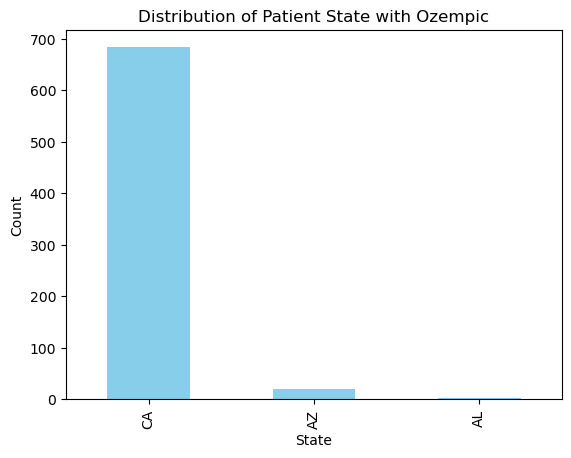

In [37]:
# Patient State: count the number of each State
counts = filtered_df['patient_state'].value_counts()

# Draw barplot to show the distribution
counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Patient State with Ozempic')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

According to this result, most of patients using Ozempic is from CA, and a small proportion of them is in ZA and AL. The obses and hypertensive patients in AK and AE have never used Ozempic in this dataset. Though we include the zipcode variable in the model to consider the location difference, we can do more research about the usage of Ozempic in different states and cities.

### 6.2 Payer channel

I didn't include this variable in the model, but I'd like to know if it would influence the usage of ozempic. If the answer is a yes, we need to do more research about it and improve the original double lasso model.

In [38]:
# Define the df again to include payor channel
df = medical[['journey_id','claim_date','patient_state','patient_short_zip',
                'patient_age','patient_gender','visit_type','payor_channel',
                'diag_1','diag_2','diag_3','diag_4','diag_5','smart_allowed','proc_code']]

# Drop the rows that contain the same information
df = df.drop_duplicates()

# Filter obese and hypersentive patient by diagnosis
df = df[df['diag_1'].str.startswith("E66")|
        df['diag_2'].str.startswith("E66")|
        df['diag_3'].str.startswith("E66")|
        df['diag_4'].str.startswith("E66")|
        df['diag_1'].str.startswith("I10")|
        df['diag_2'].str.startswith("I10")|
        df['diag_3'].str.startswith("I10")|
        df['diag_4'].str.startswith("I10")|
        df['diag_5'].str.startswith("I10")]

# Filter by age
df = df[(df['patient_age'] >= 40) & (df['patient_age'] <= 75)]

# Create treatment variable by proc_code
df['treatment'] = df['proc_code'].isin(['J3490', 'C9399']).astype(int)

In [39]:
# Show the treatment information by payor channel
pivot_df = df.pivot_table(index='payor_channel', columns='treatment', aggfunc='size', fill_value=0)
pivot_df['usage_proportion'] = pivot_df[1]/(pivot_df[0]+pivot_df[1])
sorted_df = pivot_df.sort_values(by='usage_proportion', ascending=False)

# Print the table
sorted_df

treatment,0,1,usage_proportion
payor_channel,,,
tricare,144,1,0.006897
veterans affairs,160,1,0.006211
medicaid,2146,5,0.002325
managed medicaid,29603,56,0.001888
medicare advantage,15827,24,0.001514
commercial,78962,106,0.001341
medicare,18266,12,0.000657
workers comp,2,0,0.000000


From this result, we can see the overall usage rate of Ozempic is low, which is consistent with the previous analysis. By calculating the usage proportion in different payor channels, we find that the proportion is relatively higher in tricare, veterans affairs, and medicaid. But minority patients use these payor channels.